In [133]:
!pip install alibi

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale
from sklearn.inspection import permutation_importance
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from lime.lime_tabular import LimeTabularExplainer




In [168]:
df = pd.read_csv("/content/data.csv")
df

,Unnamed: 0.1,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days,Hights_Sales
0,0,0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427,1
1,1,1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427,1
2,2,2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472,1
3,3,3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023,1
4,4,4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,4105,1704,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.782308,0.0,0.690145,1.756472,0
4106,4106,603,-0.203147,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.156366,-0.957784,-0.653045,0.0,0.690145,0.617023,0
4107,4107,504,0.705444,0.470057,0.0,0.090866,0.609512,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.435775,0.0,0.690145,0.617023,0
4108,4108,1758,0.705444,0.470057,0.0,0.090866,0.609512,0.0,0.345650,0.0,0.411492,-0.852755,0.143983,-1.053761,0.0,0.217718,1.186748,0


In [169]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Hights_Sales'].median()
df['Sales'] = (df['Hights_Sales'] >= median_sales).astype(int)

In [170]:
X = df.drop(['Hights_Sales','Sales'], axis=1)
y = df['Sales']

In [171]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [172]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [173]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [141]:
!pip install hpelm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00


In [174]:
# Convert y_train and y_test to NumPy arrays
y_train = y_train.to_numpy().reshape(-1, 1)  # Reshape to 2D array
y_test = y_test.to_numpy().reshape(-1, 1)    # Reshape to 2D array


In [175]:
# Create ELM model (1000 hidden neurons)
import hpelm # import the module to use it

elm = hpelm.HPELM(X_train.shape[1], 1)
elm.add_neurons(1000, 'sigm')  # Using sigmoid activation

In [176]:
# Train the model
elm.train(X_train, y_train, 'train')

In [177]:
# Predict using the test set
y_pred = elm.predict(X_test)

In [178]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.03068708296537612


In [179]:
# Calculate r2
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.876758471476851


In [180]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.09977581931293651


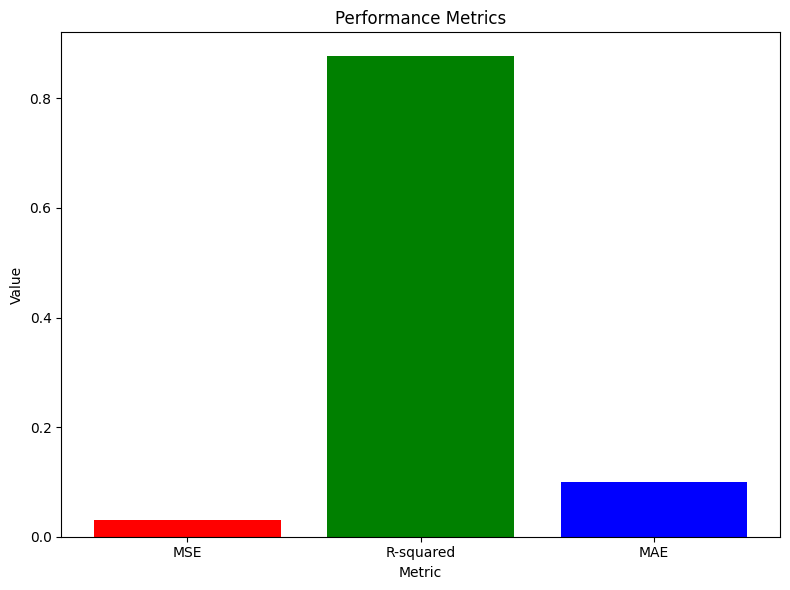

Mean Squared Error (MSE): 0.03068708296537612
R-squared: 0.876758471476851
Mean Absolute Error (MAE): 0.09977581931293651


In [192]:
metrics = ['MSE', 'R-squared', 'MAE']
values = [mse, r2, mae]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green', 'blue'])
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Feature Importance using Permutation Importance:

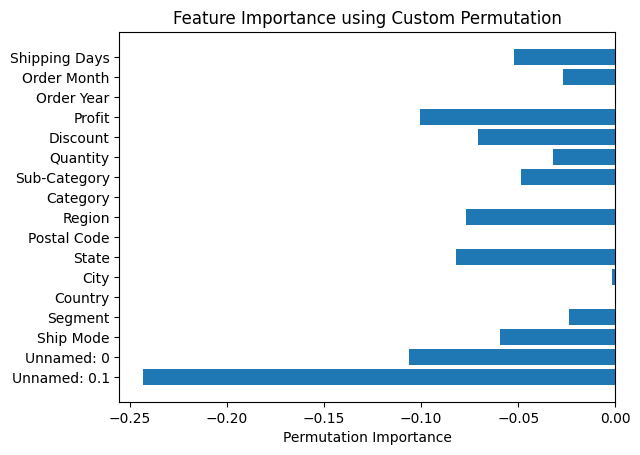

In [152]:
baseline_score = mean_squared_error(y_test, elm.predict(X_test))

# Initialize a list to store feature importances
importances = []

# Iterate through each feature
for feature_idx in range(X.shape[1]):
    X_permuted = X_test.copy()
    np.random.shuffle(X_permuted[:, feature_idx])
    permuted_score = mean_squared_error(y_test, elm.predict(X_permuted))
    importance = baseline_score - permuted_score
    importances.append(importance)

# Plot the importances
plt.barh(X.columns, importances)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance using Custom Permutation')
plt.show()


# Partial Dependence Plots (PDPs):

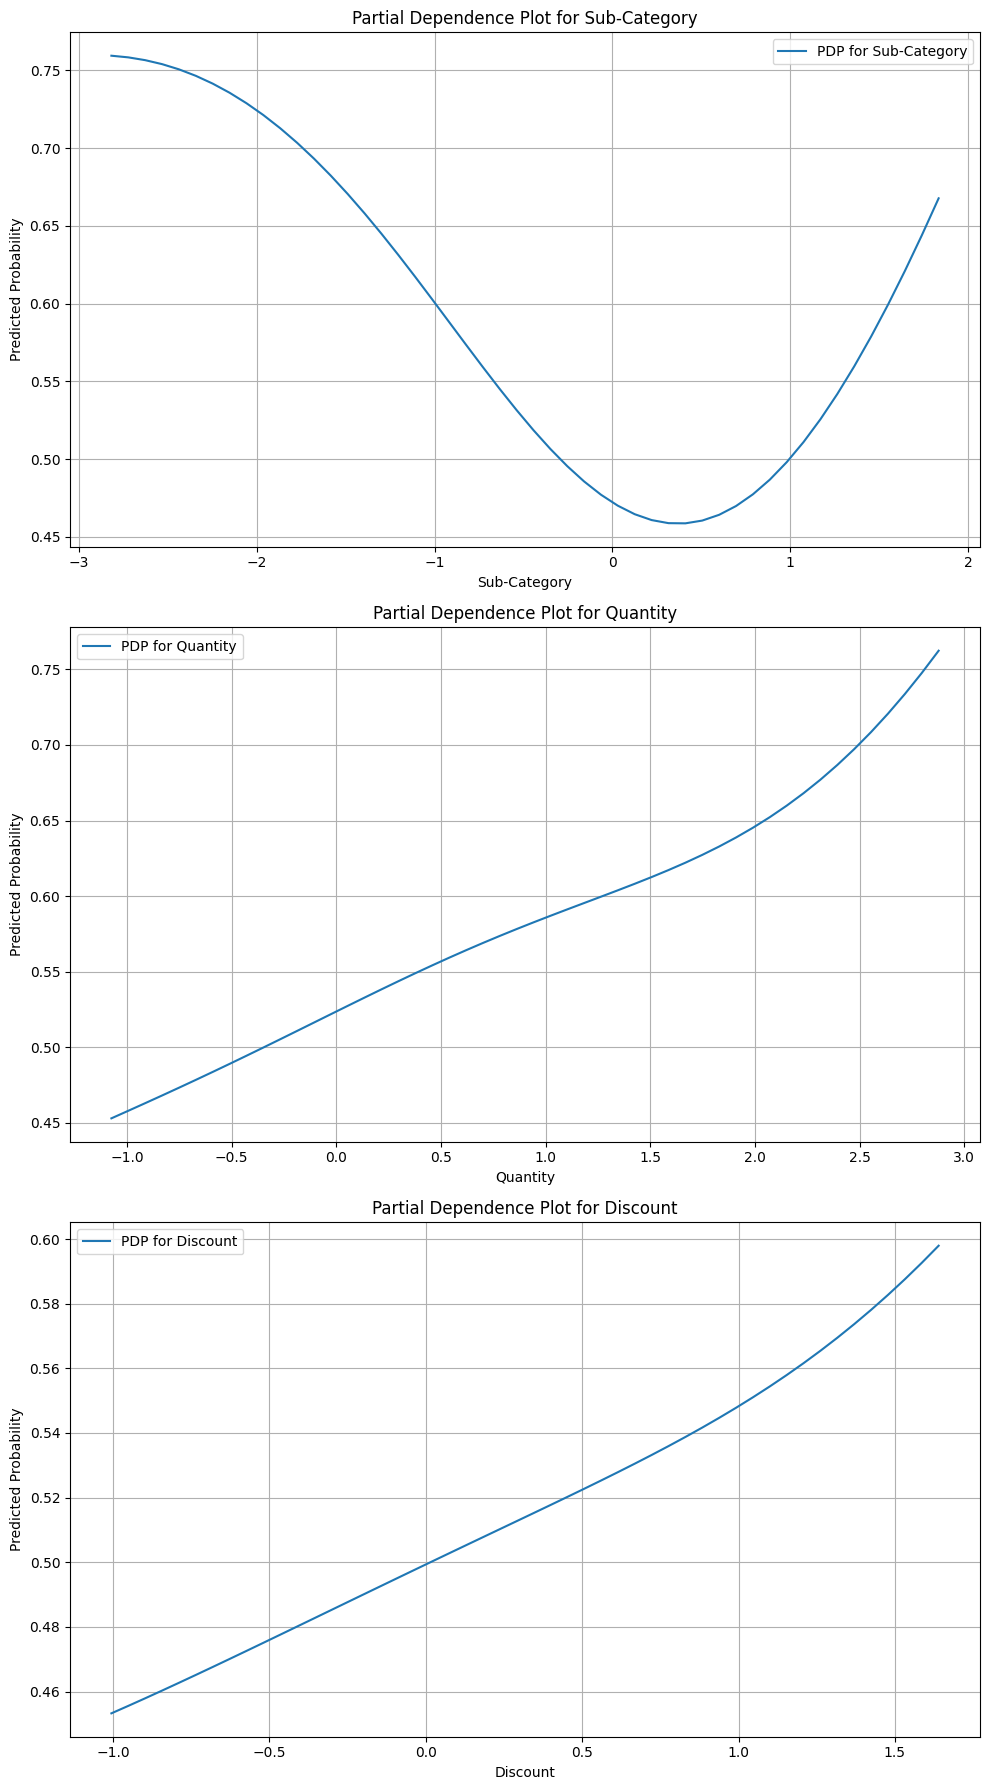

In [162]:
feature_idx = [10, 11, 12]
feature_names = X_encoded.columns[feature_idx]

# Function to generate PDP for a specific feature
def plot_pdp(features_idx, feature_names, X_train, elm):
    fig, ax = plt.subplots(len(features_idx), figsize=(10, 6 * len(features_idx)))

    for i, feature_idx in enumerate(features_idx):
        # Get the feature values and create a grid of values
        feature_values = X_train[:, feature_idx]
        min_value, max_value = feature_values.min(), feature_values.max()
        grid = np.linspace(min_value, max_value, 50)

        # Prepare a 2D array where all features except the one being analyzed are kept constant
        pdp_values = []
        for value in grid:
            X_temp = X_train.copy()
            X_temp[:, feature_idx] = value
            y_pred = elm.predict(X_temp)
            pdp_values.append(np.mean(y_pred))

        # Plot the Partial Dependence Plot (PDP)
        ax[i].plot(grid, pdp_values, label=f'PDP for {feature_names[i]}')
        ax[i].set_xlabel(feature_names[i])
        ax[i].set_ylabel('Predicted Probability')
        ax[i].set_title(f'Partial Dependence Plot for {feature_names[i]}')
        ax[i].grid(True)
        ax[i].legend()

    plt.tight_layout()
    plt.show()

# Plot the PDPs for the selected features
plot_pdp(feature_idx, feature_names, X_train, elm)


# LIME (Local Interpretable Model-agnostic Explanations):

In [ ]:
!pip install lime

In [181]:
explainer = LimeTabularExplainer(X_train, training_labels=y_train, mode="regression")
explanation = explainer.explain_instance(X_test[0], elm.predict)
explanation.show_in_notebook()


# ALE Plots

In [182]:
proba_fun_svm = elm.predict

In [183]:
# Store the columns name before scaling
X_train_columns = X_encoded.columns.tolist()
ale_rf = ALE(
    proba_fun_svm,
    feature_names=X_train_columns,
    target_names=["target"]
)
exp_rf = ale_rf.explain(X_train)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.



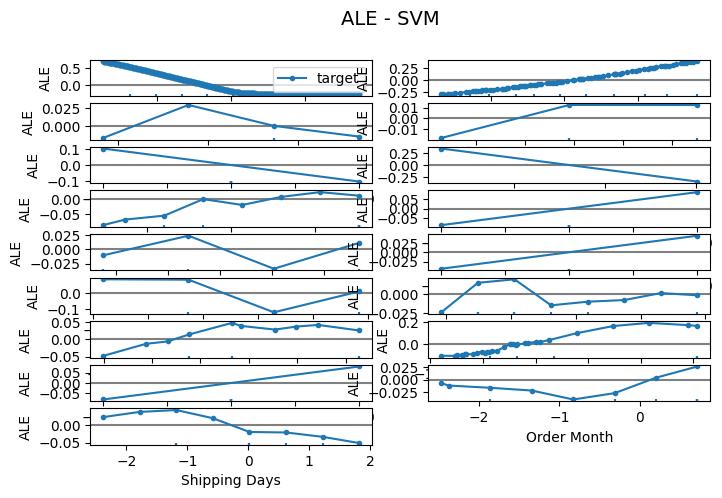

In [184]:
plot_ale(exp_rf, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None)
plt.suptitle("ALE - SVM", fontsize=14)
plt.show()

ice for SVM

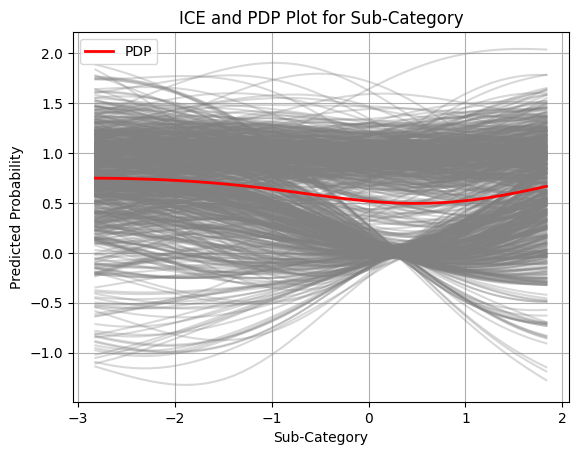

In [187]:
def plot_ice_manual(model, X, feature_idx, feature_names, grid_resolution=50):
  fig, ax = plt.subplots()

  feature_values = X[:, feature_idx]
  min_value, max_value = feature_values.min(), feature_values.max()
  grid = np.linspace(min_value, max_value, grid_resolution)

  for sample in X:
    ice_values = []
    for value in grid:
      X_temp = sample.copy().reshape(1, -1)
      X_temp[:, feature_idx] = value
      y_pred = model.predict(X_temp)
      ice_values.append(y_pred[0, 0])

    ax.plot(grid, ice_values, color='gray', alpha=0.3)

  pdp_values = []
  for value in grid:
    X_temp = X.copy()
    X_temp[:, feature_idx] = value
    y_pred = model.predict(X_temp)
    pdp_values.append(np.mean(y_pred))

  ax.plot(grid, pdp_values, color='red', linewidth=2, label='PDP')

  ax.set_xlabel(feature_names[feature_idx])
  ax.set_ylabel('Predicted Probability')
  ax.set_title(f'ICE and PDP Plot for {feature_names[feature_idx]}')
  ax.grid(True)
  ax.legend()

  plt.show()

feature_idx = 10
plot_ice_manual(elm, X_test, feature_idx, X_encoded.columns.tolist())